In [ ]:
cd /nfs/slac/g/ki/ki18/cpd/swap_catalog_diagnostics/

In [ ]:
# code to regenerate the catalogs
base_directory = '/nfs/slac/g/ki/ki18/cpd/swap_catalog_diagnostics/'
cluster_directory = base_directory

## uncomment this line when updating the shared catalog!
# base_directory = '/nfs/slac/g/ki/ki18/cpd/swap_catalog/'
# cluster_directory = base_directory + 'clusters/'


field_directory = base_directory
knownlens_path = base_directory + 'knownlens.csv'
collection_path = base_directory + 'annotated_catalog.csv'
catalog_path = cluster_directory + 'catalog.csv'

# if we're rerunning this code, we should remove the old cluster pngs,
# all of which have *_*.png
from glob import glob
files_to_delete = glob(cluster_directory + '*_*.png')
from os import remove
for delete_this_file in files_to_delete:
    remove(delete_this_file)


# run create catalog code. This can take a while.
from subprocess import call
command = ['python', './create_catalogs.py',
           '--collection', collection_path,
           '--knownlens', knownlens_path,
           '--clusters', cluster_directory,
           '--fields', field_directory,
           #'--augment', augmented_directory,
           #'--do_a_few', '100',
           ]
call(command)

## This box will be for the ipython notebook that goes to the public

In [ ]:
%matplotlib inline
import pandas as pd
from notebook_helper import *

cluster_catalog = pd.read_csv('./catalog.csv')

## this box will be for the ipython notebook that goes to the collaborators (has diagnostic info etc)

In [6]:
%matplotlib inline
import pandas as pd
#from notebook_helper import *

knownlens_catalog = pd.read_csv('./knownlens.csv')
annotated_catalog = pd.read_csv('./annotated_catalog.csv')
cluster_catalog = pd.read_csv('./catalog.csv')

`mpld3` is not strictly needed to make the below code work, but it is helpful for zooming in on the diagnostics

In [22]:
import mpld3
mpld3.enable_notebook()

Let's see what columns we have in our catalog:

In [8]:
print(cluster_catalog.columns)

Index([u'Unnamed: 0', u'ID', u'ZooID', u'location', u'mean_probability', u'category', u'kind', u'flavor', u'state', u'status', u'truth', u'stage', u'cluster_id', u'x', u'y', u'num_markers', u'skill_sum', u'tot_markers', u'cluster_marked_looks', u'total_marked_looks', u'total_looks', u'dispersion', u'field_name', u'cluster_name', u'cluster_type'], dtype='object')


In `notebook_helper.py` are a couple IPython widgets to get you started looking at the catalogs. `examine_catalog` lets you hierarchically break up the the entries in the catalog.

In [9]:
examine_catalog(cluster_catalog)

stage  flavor           cluster_type             
1      dud              dud                          1789
       lensed galaxy    dud                           819
                        known lens                      9
                        simulated lensed galaxy      1939
       lensed quasar    dud                           766
                        known lens                      9
                        simulated lensed quasar      1984
       lensing cluster  dud                           713
                        known lens                     16
                        simulated lensing cluster    1948
2      dud              dud                           299
       lensed galaxy    dud                            53
                        known lens                      1
                        simulated lensed galaxy       151
       lensing cluster  dud                            29
                        simulated lensing cluster       8
       test           

With `examine_cutouts` we can look at the individual cutouts as well as some of their properties. See the README.md for details on what each column means!

ZooID                   ASW0002cmn
cluster_id                   13958
stage                            2
flavor                        test
cluster_type               unknown
status                   undecided
num_markers                     10
tot_markers                     15
cluster_marked_looks             9
total_marked_looks              11
total_looks                     37
dispersion                5.629759
mean_probability         0.2057232
x                         196.9235
y                         93.13509
Name: 13958, dtype: object

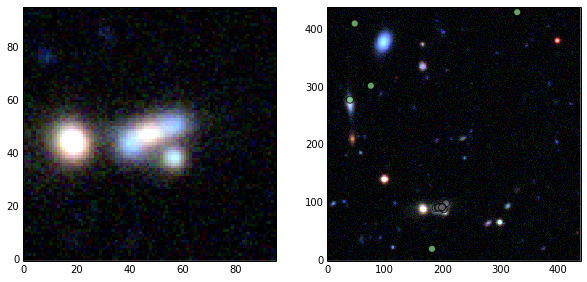

In [14]:
examine_cutouts_diagnostic(cluster_catalog, annotated_catalog,
                plot_alpha=False, invert_color=False, color_by_user=False, plot_points=True)

# Looking at specific entries in the catalog.

We can also filter out our catalog to look at specific subtypes. Let's look at all entries with `cluster_type = known lens`. We'll call it a `cluster_knownlens_catalog`.

In [25]:
cluster_knownlens_catalog = cluster_catalog[cluster_catalog['cluster_type'] == 'known lens']

In [16]:
examine_catalog(cluster_knownlens_catalog)

stage  flavor           cluster_type
1      lensed galaxy    known lens        9
       lensed quasar    known lens        9
       lensing cluster  known lens       16
2      lensed galaxy    known lens        1
       test             known lens      102
dtype: int64


ZooID                   ASW000506n
cluster_id                   13872
stage                            2
flavor                        test
cluster_type            known lens
status                   undecided
num_markers                      4
tot_markers                     11
cluster_marked_looks             4
total_marked_looks               7
total_looks                     50
dispersion                2.879669
mean_probability         0.1385119
x                         294.6087
y                          24.0663
Name: 13872, dtype: object

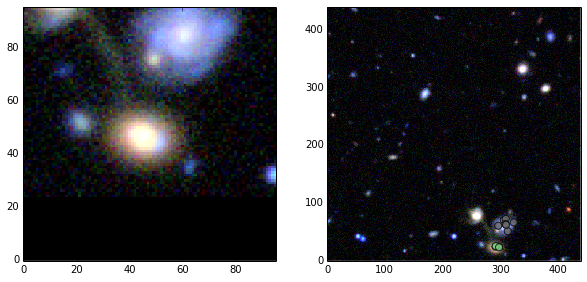

In [17]:
examine_cutouts_diagnostic(cluster_knownlens_catalog, annotated_catalog,
                plot_alpha=False, invert_color=False, color_by_user=False, plot_points=True)

Of course, we can also make multiple cuts at once. Let's find the known lenses that `SpaceWarps` appeared to miss!

ZooID                   ASW0005exg
cluster_id                   12211
stage                            2
flavor                        test
cluster_type            known lens
status                   undecided
num_markers                     18
tot_markers                     20
cluster_marked_looks            10
total_marked_looks              12
total_looks                     50
dispersion                16.69838
mean_probability         0.2757075
x                         92.86744
y                         116.4605
Name: 12211, dtype: object

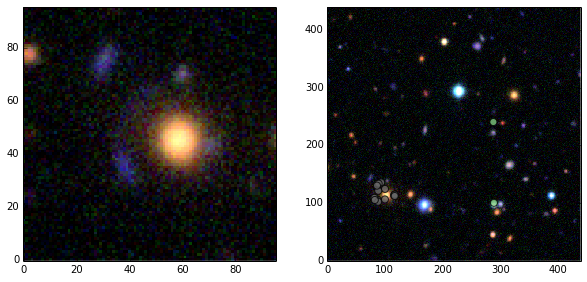

In [32]:
weak_knownlens_catalog = cluster_catalog[(cluster_catalog['cluster_type'] == 'known lens') &
                                          (cluster_catalog['mean_probability'] < 0.3)]
examine_cutouts_diagnostic(weak_knownlens_catalog, annotated_catalog,
                plot_alpha=False, invert_color=False, color_by_user=False, plot_points=True)

We also might want to know if there are any known lenses that did not make it to the cutout catalog. I therefore match the ZooIDs to the ZooIDs of the annotated catalog, which contains all the fields I used for creating the clusters. The only fields excluded from the cutout creation were the `test` fields in stage 1.

In [30]:
knownlens_catalog[~knownlens_catalog['ZooID'].isin(annotated_catalog['ZooID'])]

,Unnamed: 0,CFHTID,x,y,ZooID
2,2,CFHTLS_001_0923,237.211,174.515,ASW0000xp3
5,5,CFHTLS_004_1004,226.901,377.994,ASW0001esp
8,8,CFHTLS_005_1297,210.151,6.932,ASW000157y
22,22,CFHTLS_024_1490,326.785,122.924,ASW0002ac6
23,23,CFHTLS_024_0941,234.393,405.954,ASW0002brp
24,24,CFHTLS_024_0942,234.393,19.954,ASW0002b97
25,25,CFHTLS_024_0612,389.388,435.027,ASW0002bqt
26,26,CFHTLS_024_0613,389.388,49.027,ASW0002c1q
27,27,CFHTLS_024_0662,3.388,435.027,ASW0002b8b
28,28,CFHTLS_024_0663,3.388,49.027,ASW0002aq8


We see that there are 77 objects not in our catalog. These are all objects that must only have been in stage 1 test objects. Therefore they were all rejected at that stage.

In [36]:
weak_knownlens_catalog.rename(columns={'cluster_id': 'object_id'}, inplace=True)
print(weak_knownlens_catalog.columns)

Index([u'Unnamed: 0', u'ID', u'ZooID', u'location', u'mean_probability', u'category', u'kind', u'flavor', u'state', u'status', u'truth', u'stage', u'object_id', u'x', u'y', u'num_markers', u'skill_sum', u'tot_markers', u'cluster_marked_looks', u'total_marked_looks', u'total_looks', u'dispersion', u'field_name', u'cluster_name', u'cluster_type'], dtype='object')
